# Statistics
These statistics are based on the datasets provided (including the ones provided in the competition)
## Banking - Predicting a Loan Outcome

In [1]:
# loads data
%run ./src/load_data.py

C:\Users\joaoj\Desktop\FEUP_202223\AC\feup-ac-banking\src\load_data.py:23: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_dev = pd.read_csv(DEV_DATA_SOURCE + 'trans.csv', sep=';')


### Before Processing

#### Analysing accounts

In [2]:
accounts.head(5)


,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


As stated below, we can conclude that all accounts' attributes are non null, i.e. there aren't any missing values

In [3]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


The account_id is unique but a district_id isn't. That means that there can be more than one account per district. 

In [4]:
print("account_id unique? ", accounts.account_id.is_unique)
print("district_id unique? ", accounts.district_id.is_unique)

account_id unique?  True
district_id unique?  False


Let's analyse in which district there are more accounts 

AxesSubplot(0.125,0.11;0.775x0.77)


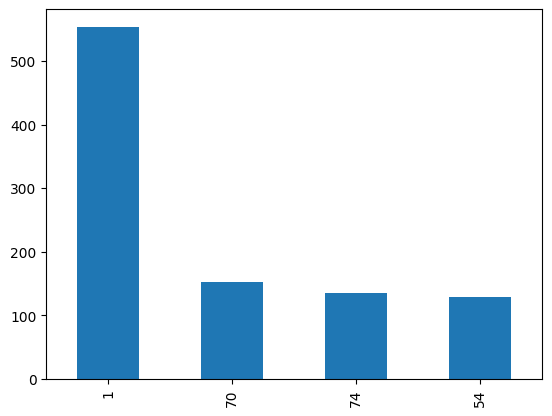

In [5]:
district_id_freq = accounts['district_id'].value_counts().iloc[:4]
print(district_id_freq.plot.bar())

As it can be seen, the District with more accounts is the one with district_id 1. Districts with id 1, 70, 74, 54 are the ones with more accounts. Other districts have a more reduced frquency (analyse another districts?)

The account's frequency attribute is not an integer, so let's check its values

In [6]:
accounts.frequency.unique()

array(['monthly issuance', 'issuance after transaction',
       'weekly issuance'], dtype=object)

In [7]:
accounts.frequency.value_counts()

monthly issuance              4167
weekly issuance                240
issuance after transaction      93
Name: frequency, dtype: int64

It can be concluded that the predominant account frequency is `monthly issuance`

The account's date isn't in a standard format, then after data processing it will be analysed

#### Analysing cards

In [8]:
cards.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


In [9]:
cards.info()
cards.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 24
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  202 non-null    int64 
 1   disp_id  202 non-null    int64 
 2   type     202 non-null    object
 3   issued   202 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


(202, 4)

There aren't missing values in the cards table

The 'issued' attribute represents a date, so after data processing this attribute will be analysed into further detail (see 'Statistics (after processing)')

#### Analysing transactions

In [11]:
transactions.head(5)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [12]:
transactions.describe()

,trans_id,account_id,date,amount,balance,account
count,4.268850e+05,426885.000000,426885.000000,426885.000000,426885.000000,1.113680e+05
mean,1.292993e+06,2729.963262,952608.706991,5911.104212,36430.137582,4.556576e+07
std,1.225990e+06,2289.052415,10471.962953,9496.324833,20160.969462,3.061523e+07
min,1.000000e+00,1.000000,930101.000000,0.000000,-17030.400000,0.000000e+00
25%,4.104230e+05,1134.000000,941209.000000,132.400000,22651.700000,1.770720e+07
50%,8.247440e+05,2328.000000,951113.000000,2040.000000,31484.900000,4.540222e+07
75%,1.681107e+06,3531.000000,960725.000000,6748.000000,45590.500000,7.165648e+07
max,3.682934e+06,11382.000000,981205.000000,86400.000000,193909.900000,9.999420e+07


Let's check for column's data types

In [13]:
transactions.info()
transactions.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426885 entries, 0 to 30199
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    426885 non-null  int64  
 1   account_id  426885 non-null  int64  
 2   date        426885 non-null  int64  
 3   type        426885 non-null  object 
 4   operation   350994 non-null  object 
 5   amount      426885 non-null  float64
 6   balance     426885 non-null  float64
 7   k_symbol    224222 non-null  object 
 8   bank        103065 non-null  object 
 9   account     111368 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 35.8+ MB


(426885, 10)

Let's check for missing values

In [14]:
transactions.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation      75891
amount             0
balance            0
k_symbol      202663
bank          323820
account       315517
dtype: int64

It can be concluded that missing values exist.(but only account is numerical)

Let's check the categorical attributes that have missing values

Values of the operation attribute:

In [15]:
transactions.operation.value_counts()

withdrawal in cash              179159
remittance to another bank       75112
credit in cash                   67506
collection from another bank     27953
credit card withdrawal            1264
Name: operation, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


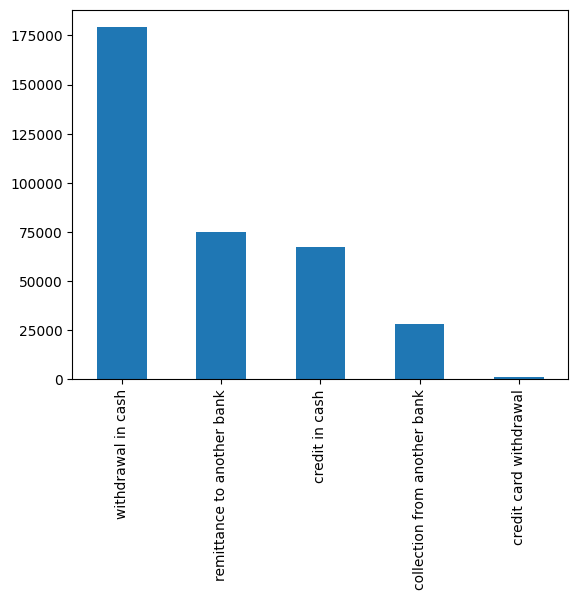

In [16]:
print(transactions.operation.value_counts().plot(kind='bar'))

#### Meaning of transactions' operation attribute

- Withdrawal in cash: "Cash withdrawals electronically convert funds from your bank account... to physical cash in hand." (https://n26.com/en-at/how-to-withdraw-money)
- Remittance to another bank: "A bank remittance is a funds transfer from one bank account to another as a gift or payment" (https://tipalti.com/en-eu/what-is-a-bank-remittance/)
- Credit in cash: "a credit is money coming in" to a account (https://smallbusiness.chron.com/differences-between-debit-credit-accounting-4063.html)
- Collection from another bank: The reverse of remittance to another bank, i.e. a money coming from another bank (based on https://docs.oracle.com/en/industries/energy-water/advanced-meter/2.9.0.0.0/c2m-user-guides/C2M_29000/C1_BP08CreditAndCollections_What_Is_A_Collection_Process_.html)
- Credit card withdrawal: money borrow against the credit card to physical cash in hand (based on https://bettermoneyhabits.bankofamerica.com/en/credit/what-is-a-credit-card-cash-advance)

Values of the k_symbol attribute:

In [17]:
transactions.k_symbol.value_counts()

interest credited                        75891
payment for statement                    61563
household                                45031
                                         20614
old-age pension                          13502
insurrance payment                        7273
sanction interest if negative balance      348
Name: k_symbol, dtype: int64

There are empty values for k_symbol attribute. So, to plot these numbers, the empty value was replaced by 'n/a'

AxesSubplot(0.125,0.11;0.775x0.77)


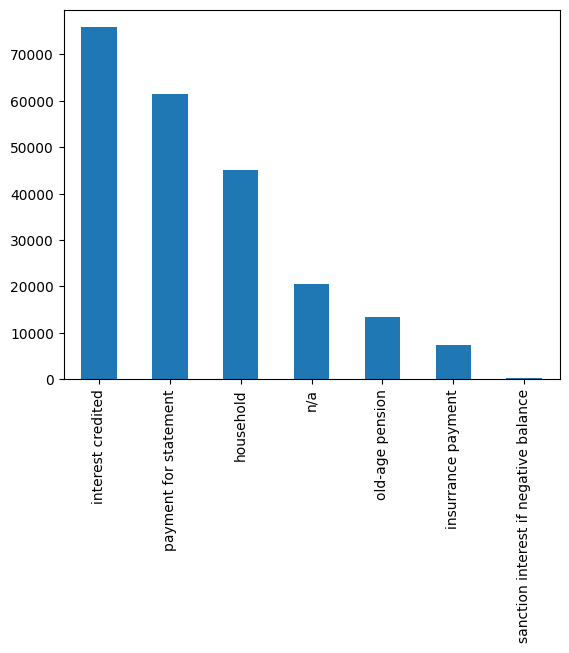

In [18]:
transactions['k_symbol'] = transactions['k_symbol'].replace(' ','n/a')

print(transactions.k_symbol.value_counts().plot(kind='bar'))

Values of the bank attribute:

In [32]:
transactions.bank.value_counts()

ST    8497
GH    8318
EF    8279
UV    8118
AB    8104
OP    8041
IJ    7974
YZ    7972
KL    7879
QR    7873
WX    7530
CD    7423
MN    7057
Name: bank, dtype: int64

The frequency of values is very similar, so it can't be concluded that much here

### Statistics (after processing)

In [19]:
# processes data
%run ./src/processing_data.py

C:\Users\joaoj\Desktop\FEUP_202223\AC\feup-ac-banking\src\load_data.py:23: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_dev = pd.read_csv(DEV_DATA_SOURCE + 'trans.csv', sep=';')


#### Analysing accounts

In [20]:
accounts.describe()

,account_id,district_id,account_year,account_month,account_day
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,95.098222,6.573556,15.030889
std,2313.811984,25.177217,1.483898,3.416507,8.443985
min,1.000000,1.000000,93.000000,1.000000,1.000000
25%,1182.750000,13.000000,93.000000,4.000000,8.000000
50%,2368.000000,38.000000,96.000000,7.000000,15.000000
75%,3552.250000,60.000000,96.000000,9.000000,22.000000
max,11382.000000,77.000000,97.000000,12.000000,30.000000


In [21]:
from src.feature_engineering.merge import merge_account_transactions
accounts = merge_account_transactions(accounts, transactions)
loans_transactions_acc = loans_dev.merge(accounts, on="account_id", how="left")
loans_transactions_acc.head(50)

import seaborn as sns
# # Create the default pairplot
# sns.pairplot(loans_transactions_acc, hue="status")

loan_id                              0.121917
account_id                           0.122633
amount                              -0.128237
duration_months                     -0.003537
monthly_payment                     -0.168433
status                               1.000000
year                                 0.024336
month                                0.132266
day                                 -0.036427
district_id                         -0.001332
account_year                         0.053818
account_month                       -0.102449
account_day                         -0.140632
average_account_credit_per_month     0.084741
average_account_debit_per_month      0.079524
average_account_balance_per_month    0.207112
Name: status, dtype: float64


C:\Users\joaoj\AppData\Local\Temp\ipykernel_39672\4149369151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values=loans_transactions_acc.corr(method='pearson')


<AxesSubplot: >

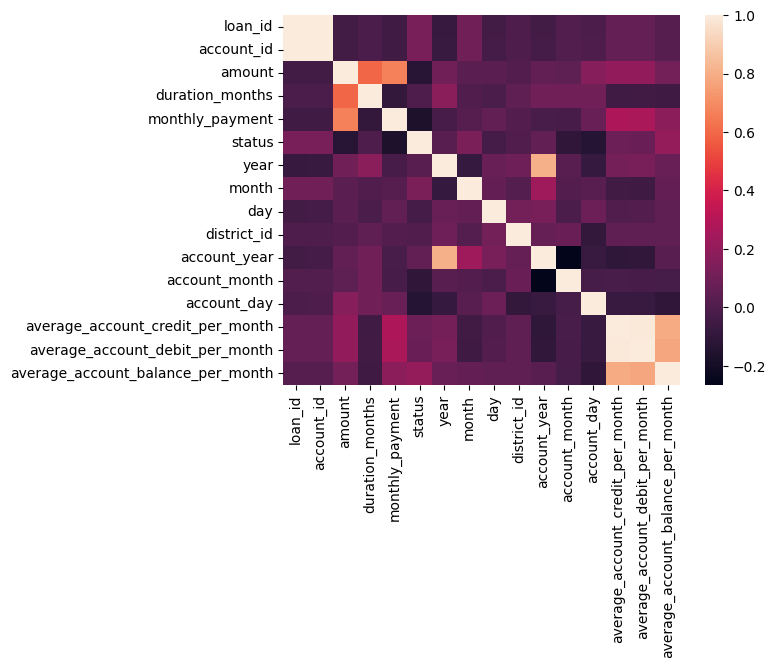

In [22]:
corr_values=loans_transactions_acc.corr(method='pearson')
print(corr_values['status'])
sns.heatmap(corr_values)

#### Analysing cards

In [23]:
cards.describe()

,card_id,disp_id,year,month,day
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,462.851485,3379.277228,95.638614,7.202970,15.816832
std,314.045324,3037.375778,0.910467,3.487489,9.119500
min,3.000000,41.000000,93.000000,1.000000,1.000000
25%,198.250000,1208.500000,95.000000,4.000000,8.000000
50%,430.000000,2706.000000,96.000000,8.000000,15.000000
75%,693.750000,4500.000000,96.000000,10.000000,24.000000
max,1247.000000,13660.000000,98.000000,12.000000,31.000000


After processing, the attribute 'issued' was split into three columns, each column representing a section of that attribute in the format dd/mm/yyyy, i.e. one column for the day, another for the month, and another for the card issue year

The following analysis will focus on the absolute frequency of the year attribute in the cards table

AxesSubplot(0.125,0.11;0.775x0.77)


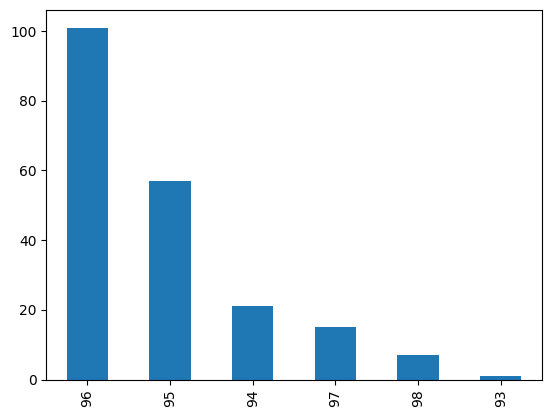

In [24]:
print(cards.year.value_counts().plot(kind='bar'))

This plot shows that there were more card issuances in the year 96

##### Card type distribution

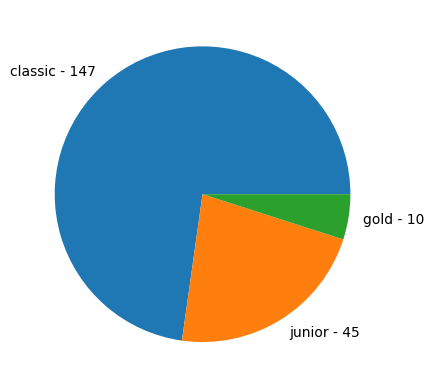

In [ ]:
graphs.plot_card_type_distribution(cards)

#### Analysing clients

##### Gender distribution

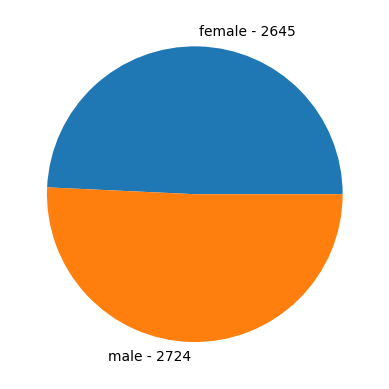

In [ ]:
graphs.plot_gender_distribution(clients)

#### Analysing dispositions

#### Plots the frequency by the number of account disponents in dispositions

AxesSubplot(0.125,0.11;0.775x0.77)


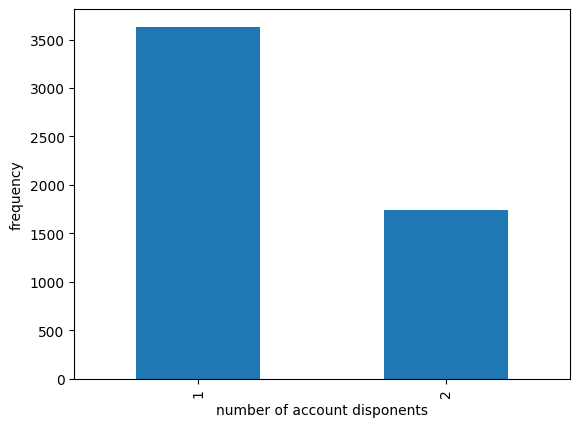

In [25]:
no_dispostions_column = dispositions["number_account_dispositions"]

print(no_dispostions_column.value_counts().plot(kind='bar', xlabel='number of account disponents', ylabel='frequency'))

#### Analysing Districts

##### Average salary per district

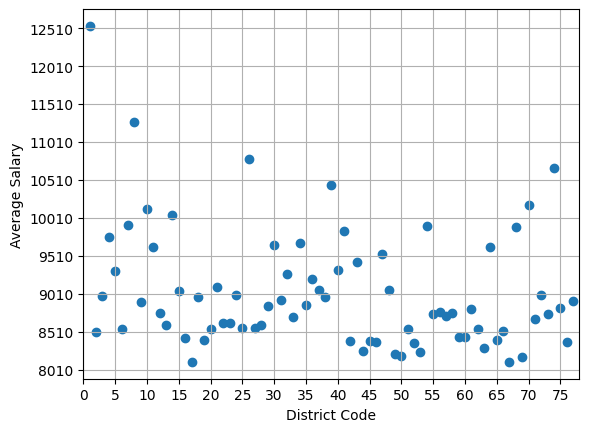

In [27]:
import src.stats.graphs as graphs
graphs.plot_salary_per_district(districts)

#### Analysing loans

##### Loans stats

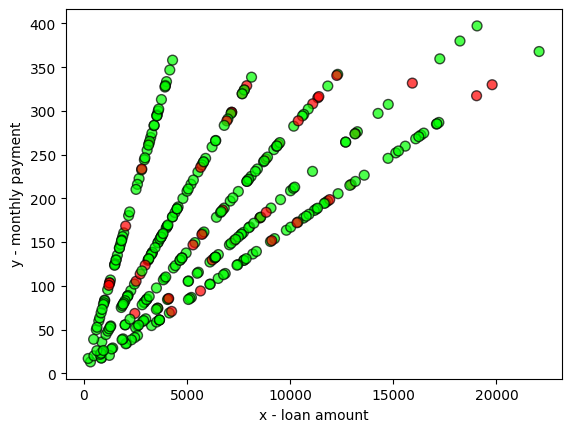

In [30]:
graphs.plot_monthly_payment_per_loan_amount(loans_dev)

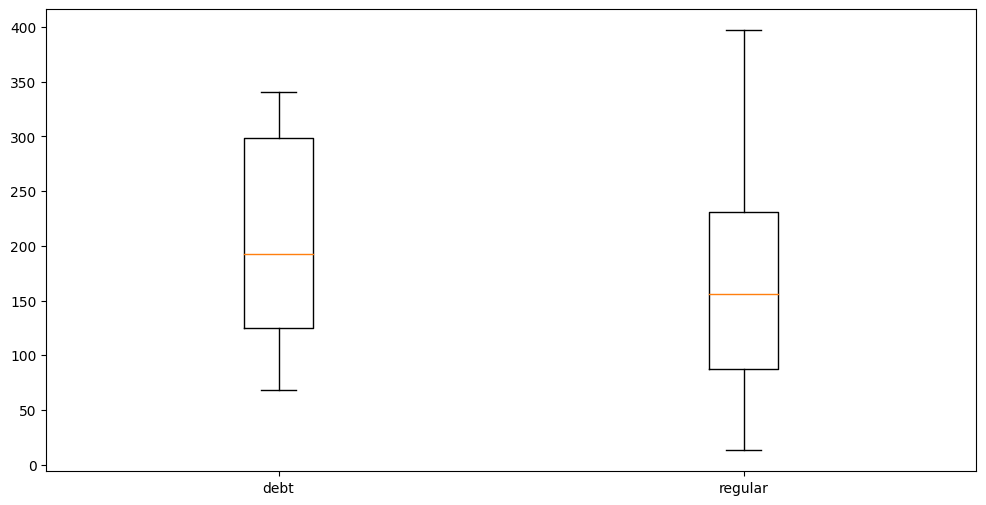

In [31]:
graphs.plot_monthly_payment_per_status(loans_dev)

#### Analysing transactions

In [36]:
transactions.describe()

,trans_id,account_id,amount,balance,account,year,month,day
count,4.268850e+05,426885.000000,426885.000000,426885.000000,1.113680e+05,426885.000000,426885.000000,426885.000000
mean,1.292993e+06,2729.963262,12.865598,1493.038433,4.556576e+07,95.191276,6.775127,18.430922
std,1.225990e+06,2289.052415,458.252587,826.269227,3.061523e+07,1.050802,3.587401,10.236644
min,1.000000e+00,1.000000,-3540.980000,-697.970000,0.000000e+00,93.000000,1.000000,1.000000
25%,4.104230e+05,1134.000000,-116.970000,928.350000,1.770720e+07,94.000000,4.000000,9.000000
50%,8.247440e+05,2328.000000,-0.600000,1290.360000,4.540222e+07,95.000000,7.000000,16.000000
75%,1.681107e+06,3531.000000,8.760000,1868.460000,7.165648e+07,96.000000,10.000000,30.000000
max,3.682934e+06,11382.000000,3066.070000,7947.130000,9.999420e+07,98.000000,12.000000,31.000000


Obtain the date of the first and last transaction

In [50]:

transaction_min_year = transactions.loc[transactions.year == transactions.year.min()]
transaction_min_month = transaction_min_year.loc[transaction_min_year.month == transaction_min_year.month.min()]
transaction_min_day = transaction_min_month.loc[transaction_min_month.day == transaction_min_month.day.min()]

transaction_max_year = transactions.loc[transactions.year == transactions.year.max()]
transaction_max_month = transaction_max_year.loc[transaction_max_year.month == transaction_max_year.month.max()]
transaction_max_day = transaction_max_month.loc[transaction_max_month.day == transaction_max_month.day.max()]

print("date of first transaction: ", transaction_min_day.day.values[0], "/", transaction_min_day.month.values[0], "/", transaction_min_day.year.values[0])
print("date of last transaction: ", transaction_max_day.day.values[0], "/", transaction_max_day.month.values[0], "/", transaction_max_day.year.values[0])


date of first transaction:  1 / 1 / 93
date of last transaction:  5 / 12 / 98
